# Mapping significant Earthquakes

### Overview
The dataset comes from Kaggle, <a href="https://www.kaggle.com/datasets/usgs/earthquake-database">Significant Earthquakes, 1965-2016</a>. In this analysis, I want to map areas affected and dicover earthquake prone areas around the world

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### Load data

In [3]:
df = pd.read_csv('database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

### Data Processing

In [5]:
# drop any all columns with NA values
df.dropna(axis=1, inplace=True)

In [6]:
# turn Date and Time columns to pandas datetime objects
df["Date"].str.len().unique()

# find indexes of fishy date & time cells(length of string is 24) and replace with correct format
indexes = df[df['Date'].str.len() == 24].index

import re

def get_date(x):
    date = re.findall('(\d{4}-\d{2}-\d{2})', x)[0]
    date = date.replace('-', '/')
    return date

def get_time(x):
    time = re.findall('(\d{2}:\d{2}:\d{2})', x)[0]
    return time

for index in indexes:
    df.loc[index,'Date'] = get_date(df.loc[index,'Date'])
    df.loc[index,'Time'] = get_time(df.loc[index,'Time'])

# concat date and time column and convert datatype to Datetime
df['Datetime'] = df['Date'] + ' ' + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])

# remove Date, Time and other unnecessary columns
df.drop(columns=['Date', 'Time', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status'], inplace=True)

### number of earthquakes year to year

1966 had the lowest number of recorded earthquakes at 234
2011 had the highest number of recorded earthquakes at 713


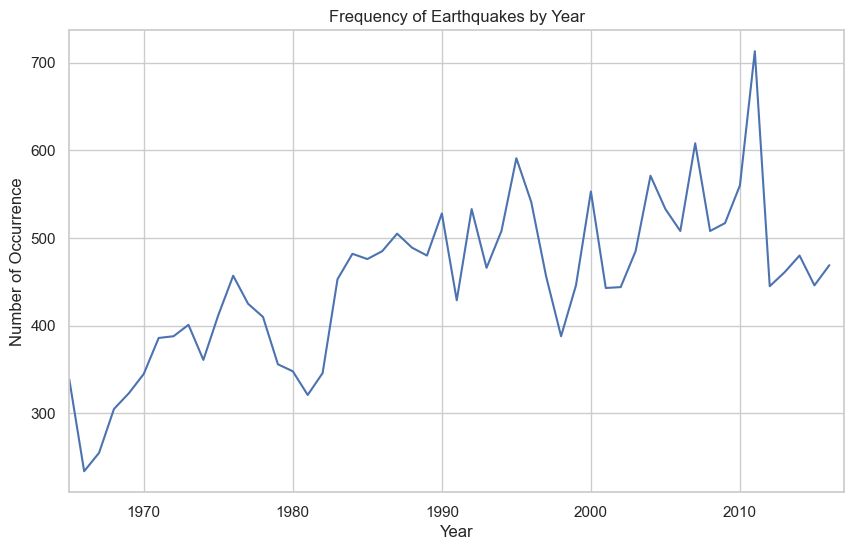

In [7]:
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
eq_per_year = df.groupby('year').count()['Latitude']

fig = plt.figure(figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2017)
sns.lineplot(data=eq_per_year, x=eq_per_year.index, y=eq_per_year.values)

max_eq = df.groupby('year').count()['Latitude'].max()
min_eq = df.groupby('year').count()['Latitude'].min()

for x, count in enumerate(eq_per_year):
    if count == max_eq:
        print(f'{eq_per_year.index[x]} had the highest number of recorded earthquakes at {max_eq}')
    elif count == min_eq:
        print(f'{eq_per_year.index[x]} had the lowest number of recorded earthquakes at {min_eq}')

### number of earthquakes based on month

<Axes: xlabel='month', ylabel='count'>

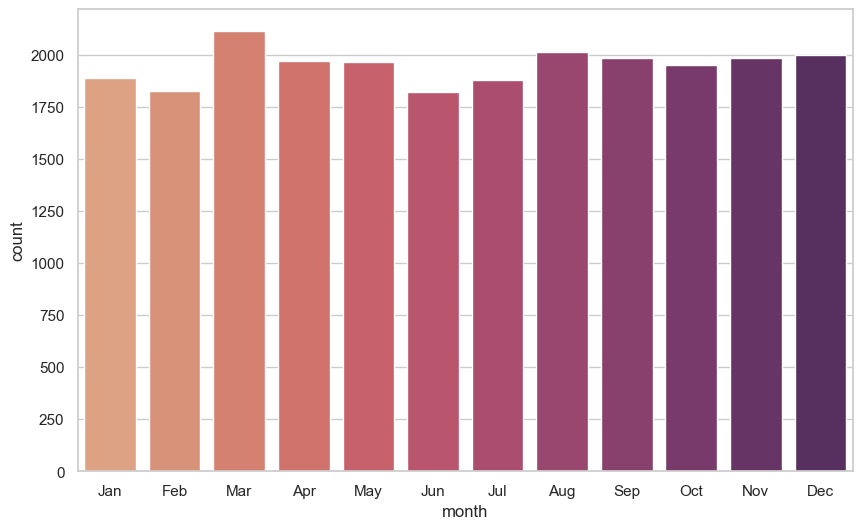

In [29]:
# turn month column to abbreviated name for better visual
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])


fig = plt.figure(figsize=(10,6))
sns.countplot(x=df["month"], palette='flare')

### average magnitude of earthquake per year

/var/folders/4s/b1xc_yr953d0psqkhxxqy7b00000gn/T/ipykernel_7280/2578591868.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_mag_yr = df.groupby('year').mean()['Magnitude']


<Axes: title={'center': 'Average Magnitude each Year'}, xlabel='Year', ylabel='Magnitude'>

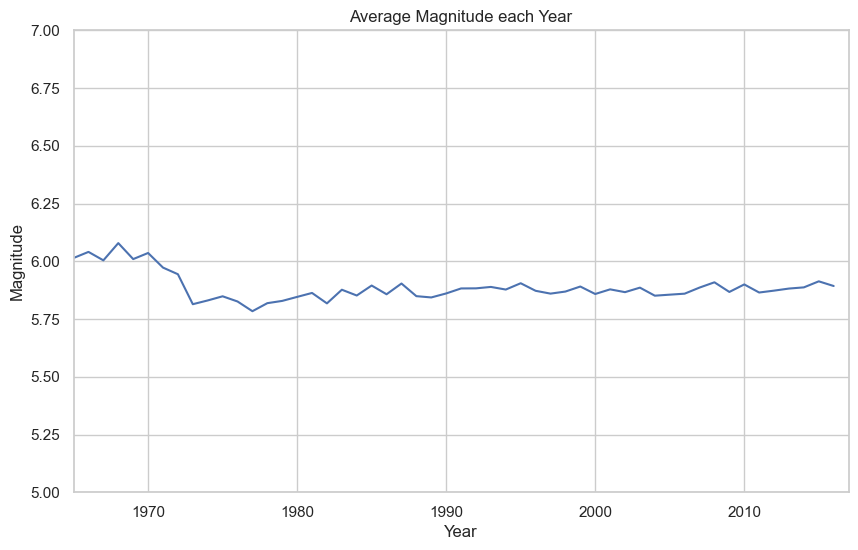

In [9]:
avg_mag_yr = df.groupby('year').mean()['Magnitude']

fig = plt.figure(figsize=(10,6))
plt.xlabel("Year")
plt.ylabel("Magnitude")
plt.title("Average Magnitude each Year")
plt.xlim(1965,2017)
plt.ylim(5, 7)
sns.lineplot(data=avg_mag_yr, x=avg_mag_yr.index, y=avg_mag_yr.values)

### Count of each Earthquake type

In [10]:
df.groupby('Type').count()['year'].to_frame()

,year
Type,
Earthquake,23232
Explosion,4
Nuclear Explosion,175
Rock Burst,1


### distribution of magnitudes

Magnitude  total occurences
5-5.99     16058
6-6.99     6616
7-7.99     698
8-8.99     38
9-9.99     2


Text(0.5, 1.0, 'Distribution of Magnitudes')

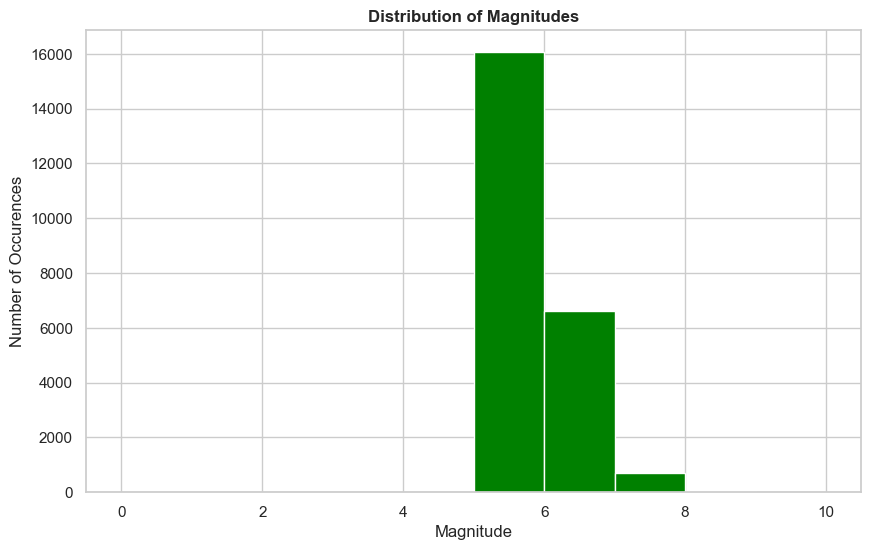

In [11]:
import math 

df['mag_cat'] = df['Magnitude'].apply(math.floor)
dist_mag = df.groupby('mag_cat').count()['year'].to_frame()
dist_mag

print('Magnitude  total occurences')
for i in range(len(dist_mag.index)):
    mag_r = f'{str(dist_mag.index[i])}-{str(dist_mag.index[i]+.99)}'
    count = dist_mag.iloc[i]['year']
    print(f'{mag_r}     {count}')

fig = plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df['mag_cat'], range=(0,10), bins=10,color ='green',alpha = 1)
  
plt.xlabel('Magnitude')
plt.ylabel('Number of Occurences')
plt.title('Distribution of Magnitudes', fontweight='bold')

# plt.hist(df['mag_cat'])

In [13]:
import geopandas

In [17]:
geometry = geopandas.points_from_xy(df.Longitude, df.Latitude)
geo_df = geopandas.GeoDataFrame(
    df, geometry=geometry
)

,Latitude,Longitude,Type,Depth,Magnitude,Datetime,month,year,mag_cat,geometry
0,19.246,145.616,Earthquake,131.6,6.0,1965-01-02 13:44:18,1,1965,6,POINT (145.61600 19.24600)
1,1.863,127.352,Earthquake,80.0,5.8,1965-01-04 11:29:49,1,1965,5,POINT (127.35200 1.86300)
2,-20.579,-173.972,Earthquake,20.0,6.2,1965-01-05 18:05:58,1,1965,6,POINT (-173.97200 -20.57900)
3,-59.076,-23.557,Earthquake,15.0,5.8,1965-01-08 18:49:43,1,1965,5,POINT (-23.55700 -59.07600)
4,11.938,126.427,Earthquake,15.0,5.8,1965-01-09 13:32:50,1,1965,5,POINT (126.42700 11.93800)


In [18]:
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

### Map of all earthquakes

Text(0.5, 1.0, 'Earthquakes')

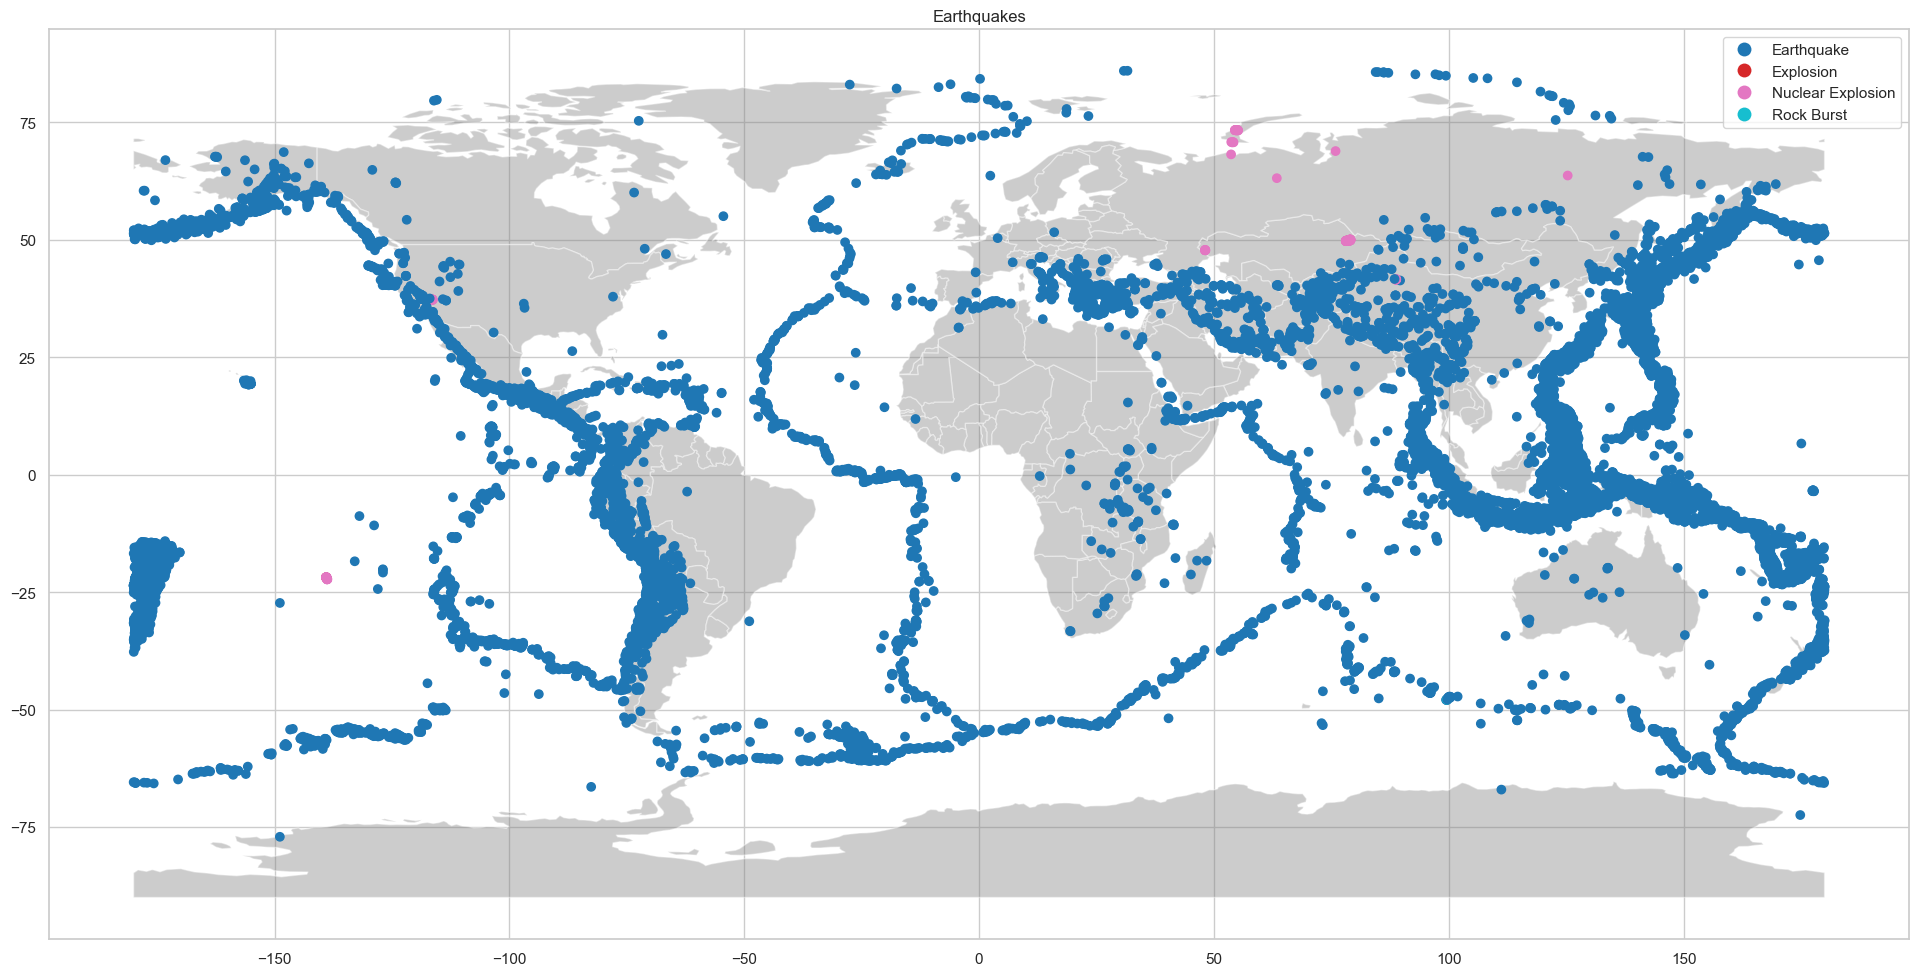

In [22]:
fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True)
plt.title("Earthquakes")

### Map of earthquakes with magnitudes 8.0 or higher

Text(0.5, 1.0, 'Locations of intense(magnitude>8.0) Earthquakes')

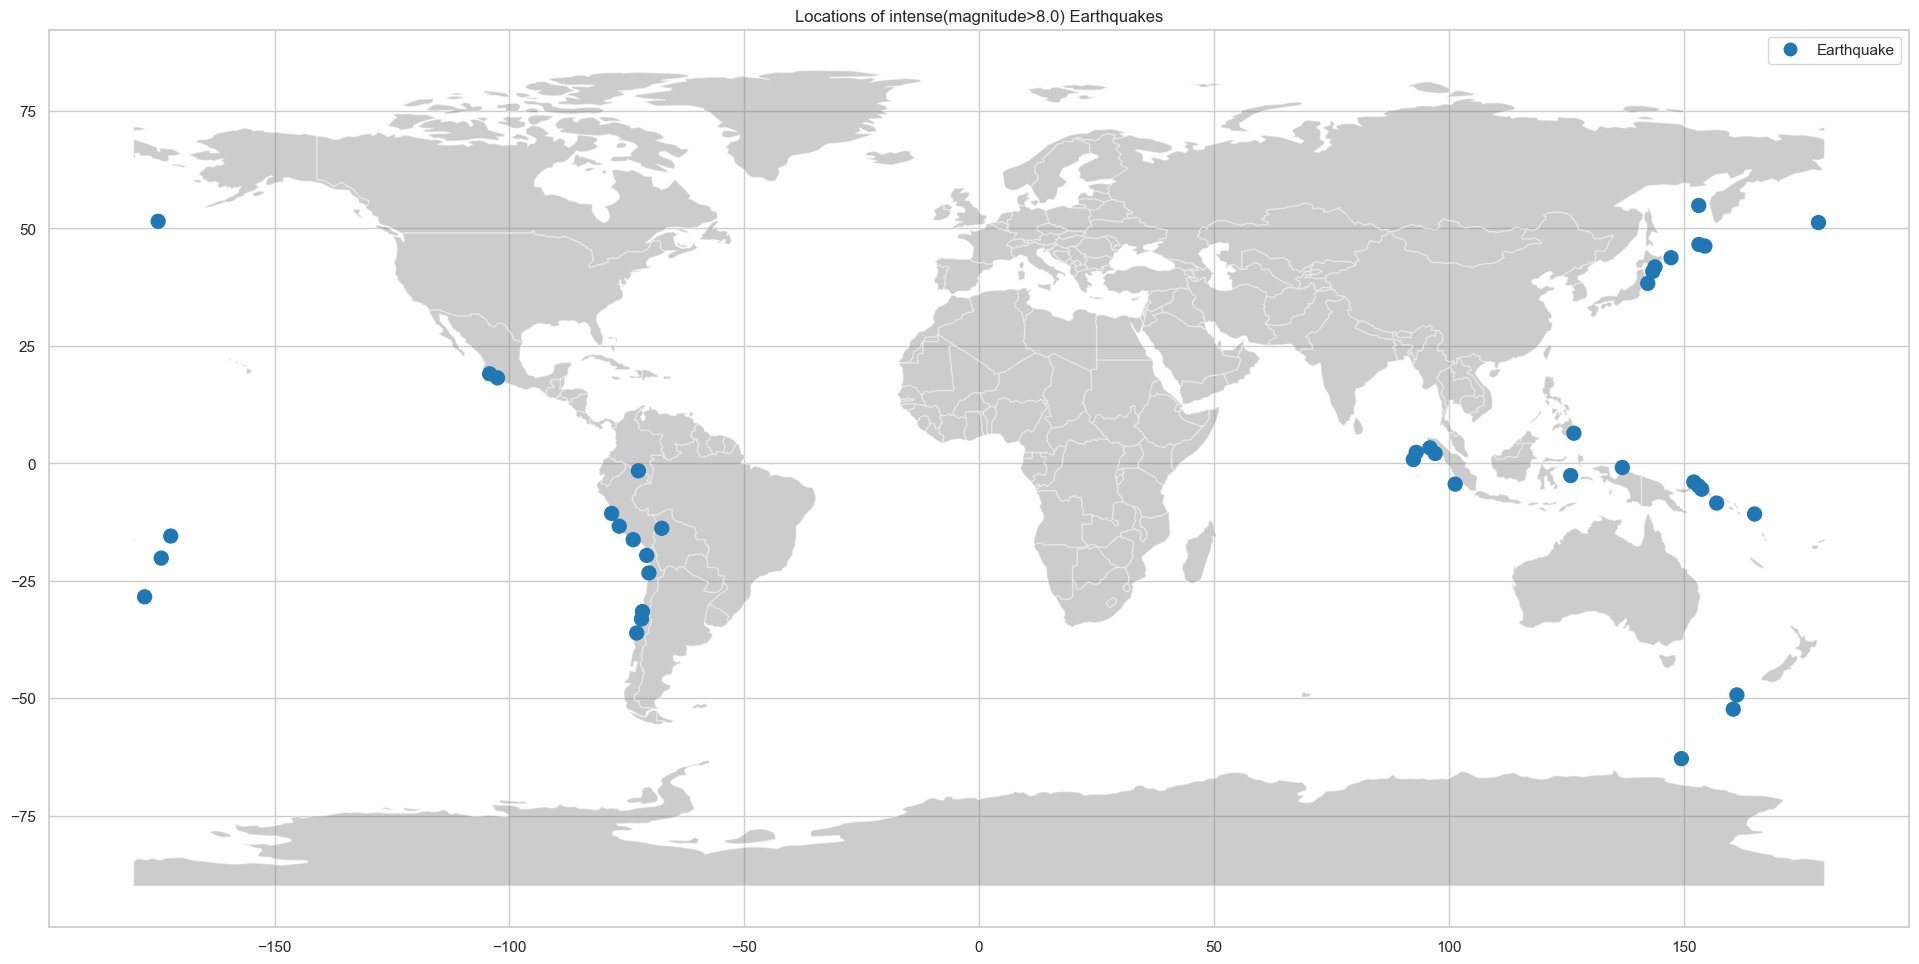

In [28]:
intense = df[df['Magnitude'] >=8]

geometry = geopandas.points_from_xy(intense.Longitude, intense.Latitude)
geo_df = geopandas.GeoDataFrame(
    intense, geometry=geometry
)

fig, ax = plt.subplots(figsize=(24, 18))
world.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(column="Type", ax=ax, legend=True, markersize=100)
plt.title("Locations of intense(magnitude>8.0) Earthquakes")